In [101]:
# Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [102]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
# !pip install joblib

In [170]:
import os

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets

import keras
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense, Flatten, Dropout, Activation
from keras.models import Sequential
from keras.regularizers import l2
from keras.optimizers import SGD, RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses
from sklearn.utils import shuffle

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
# from keras.optimizers import SGD

import joblib


In [104]:
# fix random seed for reproducibility
seed=231
np.random.seed(231)


## Read the Dataset

##### White wine source data set

In [105]:
# white_datafile = os.path.join("..", "data", "sourcedata", "winequality-white.csv")
# print(white_datafile)

# white_df = pd.read_csv(white_datafile, delimiter=";")
# white_df.sort_values(by=['pH'], ascending=True)

##### Red wine source data set

In [106]:
datafile = os.path.join("..", "data", "sourcedata", "winequality-red.csv")
print(datafile)

red_df = pd.read_csv(datafile, delimiter=";")
red_df.head()
red_df.sort_values(by=['quality'], ascending=False)

..\data\sourcedata\winequality-red.csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
495,10.7,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
1403,7.2,0.330,0.33,1.70,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8
390,5.6,0.850,0.05,1.40,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
1061,9.1,0.400,0.50,1.80,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8
1202,8.6,0.420,0.39,1.80,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8
...,...,...,...,...,...,...,...,...,...,...,...,...
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,3


## Select Features and Split the Data

In [107]:
wine_df = red_df

##### Set the target attribute (y axis)

In [108]:
y = wine_df["quality"].values.reshape(-1,1)
y

array([[5],
       [5],
       [5],
       ...,
       [6],
       [5],
       [6]], dtype=int64)

###### drop the target (quality) column from data to have dataeframe of just the attributes we are regressing

In [109]:
X = wine_df.drop("quality", axis=1)
feature_names = X.columns
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


###### split the training and testing data

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42345)

#### Scale the data

In [111]:
# from sklearn.preprocessing import StandardScaler
# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

In [112]:
from sklearn.preprocessing import PowerTransformer
X_scaler = PowerTransformer(method='yeo-johnson').fit(X_train)
y_scaler = PowerTransformer(method='yeo-johnson').fit(y_train)

C:\Users\jimco\Anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [113]:
# from sklearn.preprocessing import QuantileTransformer
# X_scaler = QuantileTransformer(output_distribution='normal').fit(X_train)
# y_scaler = QuantileTransformer(output_distribution='normal').fit(y_train)

In [114]:
# from sklearn.preprocessing import MinMaxScaler
# X_scaler = MinMaxScaler(feature_range=(0, 1)).fit(X_train)
# y_scaler = MinMaxScaler(feature_range=(0, 1)).fit(y_train)

In [115]:
# from sklearn.preprocessing import MaxAbsScaler
# X_scaler = MaxAbsScaler().fit(X_train)
# y_scaler = MaxAbsScaler().fit(y_train)

In [116]:
# from sklearn.preprocessing import RobustScaler
# X_scaler = RobustScaler(quantile_range=(25, 75)).fit(X_train)
# y_scaler = RobustScaler(quantile_range=(25, 75)).fit(y_train)

In [117]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

### One-hot encode the labels

Step 1: Label-encode data set

step 2 - One hot encode the label encoded data  

In [118]:
# One-hot encoding label encoded data
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical[:20]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [119]:
# encoded_y_train[:7]

In [120]:
# y_test_categorical[:7]

In [121]:
# encoded_y_test[:7]

# Train the Model



In [122]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
# from sklearn.model_selection import GridSearchCV
# from keras.wrappers.scikit_learn import KerasClassifier
# from keras.constraints import maxnorm
# from keras.optimizers import SGD

In [123]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
### first Model: 
# model = Sequential()

# number_inputs = 39
# number_hidden_nodes = 100
# number_classes = 3

# model.add(Dense(units=number_hidden_nodes,
#                 activation='relu', input_dim=number_inputs))
# model.add(Dense(units=number_classes, activation='softmax'))

In [124]:
# Create Model Function to create, compile and return a Keras NN model
#model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

def create_model (activation='relu', dropout_rate=0.2, hidden_units=100, 
                  optimizer='adam', loss='mse', metrics='accuracy'):
      
    #create model (11 inputs, 2 hidden layers, a droupout layer between each hidden layer, 1 outputs)
    number_inputs = 11
    number_outputs = 9
    
    model = Sequential()
    
    ## layer-1: Input 
    ## Layer-2: 1st hidden layer
    model.add(Dense(input_dim=number_inputs, units=hidden_units, 
                    activation=activation
                   ))
    
    # Layer-3 dropout  layer between hidden layers 
    model.add(Dropout(dropout_rate))
    
    # Layer-4: 2nd hidden layer
    model.add(Dense(units=100, 
                    activation=activation
                   ))
   
   
    # layer-8 output layer
    model.add(Dense(units=number_outputs,
                    #kernel_initializer=init_mode,
                    activation='softmax'))
    
    ## Compile the Model
    ## Now that we have our model architecture defined, 
    ## we must compile the model using a loss function and optimizer. 
    ## We can also specify additional training metrics such as accuracy.
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=[metrics])
    
    return model



In [125]:
# Create Model Function to create, compile and return a Keras NN model
# def create_complex_model (activation='relu', dropout_rate=0.2, hidden_units=100, 
#                   optimizer='adam', loss='categorical_crossentropy', metrics='accuracy'):
      
#     #create model (39 inputs, 3 hidden layers, a droupout layer between each hidden layer, 3 outputs)
#     number_inputs = 39
#     #number_hidden_nodes = 100 # (3 hidden layers)
#     number_classes = 3
    
#     model = Sequential()
    
#     ## layer-1: Input 
#     ## Layer-2: 1st hidden layer
#     model.add(Dense(input_dim=number_inputs, units=hidden_units, 
#                     activation=activation
#                     #kernel_initializer=init_mode,
#                     #kernel_constraint=maxnorm(weight_constraint)
#                    ))
    
#     # Layer-3 dropout  layer between hidden layers 
#     model.add(Dropout(dropout_rate))
    
#     # Layer-4: 2nd hidden layer
#     model.add(Dense(units=hidden_units, 
#                     activation=activation
#                     #kernel_initializer=init_mode,
#                     #kernel_constraint=maxnorm(weight_constraint)
#                    ))
    
#     # layer-5: dropout between hidden layers 
#     model.add(Dropout(dropout_rate))
    
#     # layer-6 hidden layer
#     model.add(Dense(units=hidden_units, 
#                     activation=activation
#                     #kernel_initializer=init_mode,
#                     #kernel_constraint=maxnorm(weight_constraint)
#                    ))
    
#     # layer-7: dropout between hidden layer and output layer 
# #     model.add(Dropout(dropout_rate))
    
#     # layer-8 output layer
#     model.add(Dense(units=number_classes,
#                     #kernel_initializer=init_mode,
#                     activation='softmax'))
    
#     ## Compile the Model
#     ## Now that we have our model architecture defined, 
#     ## we must compile the model using a loss function and optimizer. 
#     ## We can also specify additional training metrics such as accuracy.
#     model.compile(optimizer=optimizer,
#                   loss=loss,
#                   metrics=[metrics])
    
#     return model



In [126]:
### 2nd model
model = create_model()

In [127]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               1200      
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 9)                 909       
Total params: 12,209
Trainable params: 12,209
Non-trainable params: 0
_________________________________________________________________


In [128]:
# batch_size=100
# epochs=100
# # # model = KerasClassifier(build_fn=create_model, batch_size=batch_size, epochs=epochs)
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [129]:
# # use SGD optimizer
# from keras.optimizers import SGD

# sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

# # Use categorical crossentropy for categorical data and mean squared error for regression
# # Hint: your output layer in this example is using software for logistic regression (categorical)
# # If your output layer activation was `linear` then you may want to use `mse` for loss
# model.compile(optimizer=sgd,
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [130]:
# #  Using RMS optimizer 

# from keras.optimizers import RMSprop

# # defining the parameters for RMSprop (I used the keras defaults here)
# rms = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

# # Use categorical crossentropy for categorical data and mean squared error for regression
# # Hint: your output layer in this example is using software for logistic regression (categorical)
# # If your output layer activation was `linear` then you may want to use `mse` for loss
# model.compile(optimizer=rms,
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [131]:
# Use categorical crossentropy for categorical data and mean squared error for regression
# Hint: your output layer in this example is using software for logistic regression (categorical)
# If your output layer activation was `linear` then you may want to use `mse` for loss
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

### Train the Model

In [132]:
# Fit (train) the model
epochs=100
batch_size=100
model_history = model.fit(
    X_train_scaled, y_train_categorical,
    epochs=epochs, 
    batch_size=batch_size,
    shuffle=True,
    verbose=1,
    validation_data=(X_test_scaled, y_test_categorical)
)

Train on 1199 samples, validate on 400 samples
Epoch 1/300
1199/1199 [==============================] - 1s 855us/step - loss: 0.0922 - accuracy: 0.3028 - val_loss: 0.0816 - val_accuracy: 0.5100
Epoch 2/300
1199/1199 [==============================] - 0s 48us/step - loss: 0.0749 - accuracy: 0.5188 - val_loss: 0.0702 - val_accuracy: 0.5375
Epoch 3/300
1199/1199 [==============================] - 0s 57us/step - loss: 0.0656 - accuracy: 0.5446 - val_loss: 0.0643 - val_accuracy: 0.5475
Epoch 4/300
1199/1199 [==============================] - 0s 49us/step - loss: 0.0617 - accuracy: 0.5838 - val_loss: 0.0614 - val_accuracy: 0.6125
Epoch 5/300
1199/1199 [==============================] - 0s 51us/step - loss: 0.0603 - accuracy: 0.5922 - val_loss: 0.0609 - val_accuracy: 0.6000
Epoch 6/300
1199/1199 [==============================] - 0s 51us/step - loss: 0.0600 - accuracy: 0.5922 - val_loss: 0.0605 - val_accuracy: 0.6100
Epoch 7/300
1199/1199 [==============================] - 0s 52us/step - loss

Epoch 112/300
1199/1199 [==============================] - 0s 52us/step - loss: 0.0384 - accuracy: 0.7798 - val_loss: 0.0588 - val_accuracy: 0.6425
Epoch 113/300
1199/1199 [==============================] - 0s 57us/step - loss: 0.0391 - accuracy: 0.7665 - val_loss: 0.0584 - val_accuracy: 0.6575
Epoch 114/300
1199/1199 [==============================] - 0s 54us/step - loss: 0.0382 - accuracy: 0.7748 - val_loss: 0.0585 - val_accuracy: 0.6450
Epoch 115/300
1199/1199 [==============================] - 0s 58us/step - loss: 0.0380 - accuracy: 0.7832 - val_loss: 0.0583 - val_accuracy: 0.6575
Epoch 116/300
1199/1199 [==============================] - 0s 57us/step - loss: 0.0379 - accuracy: 0.7898 - val_loss: 0.0587 - val_accuracy: 0.6550
Epoch 117/300
1199/1199 [==============================] - 0s 52us/step - loss: 0.0393 - accuracy: 0.7590 - val_loss: 0.0586 - val_accuracy: 0.6600
Epoch 118/300
1199/1199 [==============================] - 0s 54us/step - loss: 0.0385 - accuracy: 0.7773 - val_

1199/1199 [==============================] - 0s 64us/step - loss: 0.0275 - accuracy: 0.8549 - val_loss: 0.0595 - val_accuracy: 0.6425
Epoch 223/300
1199/1199 [==============================] - ETA: 0s - loss: 0.0426 - accuracy: 0.76 - 0s 54us/step - loss: 0.0288 - accuracy: 0.8432 - val_loss: 0.0594 - val_accuracy: 0.6675
Epoch 224/300
1199/1199 [==============================] - 0s 59us/step - loss: 0.0282 - accuracy: 0.8424 - val_loss: 0.0596 - val_accuracy: 0.6525
Epoch 225/300
1199/1199 [==============================] - 0s 57us/step - loss: 0.0284 - accuracy: 0.8574 - val_loss: 0.0596 - val_accuracy: 0.6550
Epoch 226/300
1199/1199 [==============================] - 0s 56us/step - loss: 0.0279 - accuracy: 0.8549 - val_loss: 0.0593 - val_accuracy: 0.6575
Epoch 227/300
1199/1199 [==============================] - 0s 58us/step - loss: 0.0289 - accuracy: 0.8357 - val_loss: 0.0594 - val_accuracy: 0.6700
Epoch 228/300
1199/1199 [==============================] - 0s 48us/step - loss: 0.02

Epoch 277/300
1199/1199 [==============================] - 0s 53us/step - loss: 0.0252 - accuracy: 0.8674 - val_loss: 0.0599 - val_accuracy: 0.6600
Epoch 278/300
1199/1199 [==============================] - 0s 58us/step - loss: 0.0249 - accuracy: 0.8749 - val_loss: 0.0595 - val_accuracy: 0.6625
Epoch 279/300
1199/1199 [==============================] - 0s 56us/step - loss: 0.0252 - accuracy: 0.8774 - val_loss: 0.0604 - val_accuracy: 0.6625
Epoch 280/300
1199/1199 [==============================] - 0s 65us/step - loss: 0.0248 - accuracy: 0.8682 - val_loss: 0.0594 - val_accuracy: 0.6700
Epoch 281/300
1199/1199 [==============================] - 0s 63us/step - loss: 0.0250 - accuracy: 0.8682 - val_loss: 0.0604 - val_accuracy: 0.6650
Epoch 282/300
1199/1199 [==============================] - 0s 67us/step - loss: 0.0238 - accuracy: 0.8707 - val_loss: 0.0608 - val_accuracy: 0.6475
Epoch 283/300
1199/1199 [==============================] - 0s 56us/step - loss: 0.0244 - accuracy: 0.8741 - val_

### Plot the Learning History

In [133]:
#model.history.history

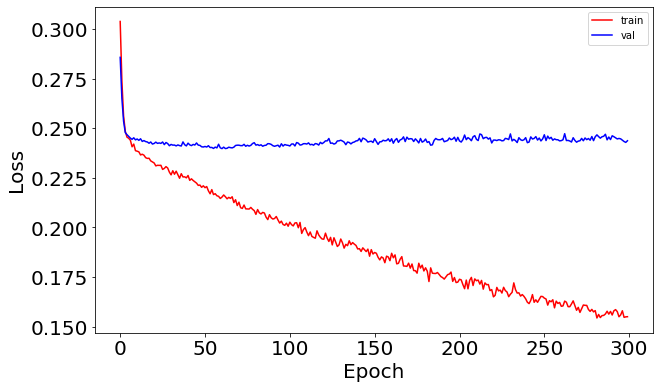

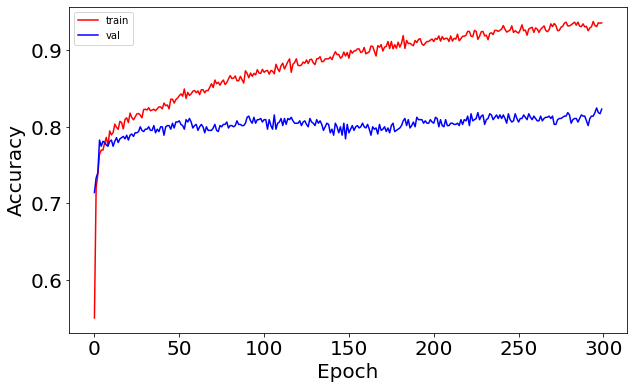

In [134]:
# http://localhost:8888/notebooks/DABC_hw/machine-learning-challenge/model_1.ipynb

# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['accuracy']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_accuracy']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [135]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               1200      
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 9)                 909       
Total params: 12,209
Trainable params: 12,209
Non-trainable params: 0
_________________________________________________________________


In [136]:
# print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
# print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

## Quantifying the Model
We use our testing data to validate our model. This is how we determine the validity of our model (i.e. the ability to predict new and previously unseen data points)

In [137]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.059372124075889585, Accuracy: 0.6775000095367432


In [138]:
X_test[:1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1552,6.3,0.68,0.01,3.7,0.103,32.0,54.0,0.99586,3.51,0.66,11.3


## Making Predictions with new data

We can use our trained model to make predictions using `model.predict`

In [139]:
import numpy as np
# test = np.expand_dims(X_test[:1], axis=0)
test = X_test_scaled[:1]
test.shape
test

array([[-1.39629552,  0.90935864, -1.46682535,  1.43746168,  0.93689428,
         1.42470036,  0.5660564 ,  0.        ,  1.2709058 ,  0.25985935,
         0.97826356]])

In [140]:
test = np.asarray(test).astype(np.float32)

In [141]:
prediction = model.predict_classes(test)
print(f"Predicted class: {prediction}")

Predicted class: [6]


In [142]:
# label_encoder.inverse_transform(prediction)

In [143]:
# Make predictions
predictions = model.predict_classes(X_test_scaled)

In [144]:
predictions.shape

(400,)

In [145]:
y_test.shape

(400, 1)

In [146]:
predicts_df = pd.DataFrame(columns=["y_test", "predictions"])
predicts_df['predictions'] = predictions
predicts_df['y_test'] = y_test
predicts_df

,y_test,predictions
0,6,6
1,6,6
2,5,5
3,6,6
4,6,6
...,...,...
395,6,6
396,6,6
397,4,6
398,5,5


In [147]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.50      0.07      0.12        15
           5       0.74      0.76      0.75       169
           6       0.60      0.75      0.67       149
           7       0.79      0.50      0.61        60
           8       0.00      0.00      0.00         5

    accuracy                           0.68       400
   macro avg       0.44      0.35      0.36       400
weighted avg       0.67      0.68      0.66       400



C:\Users\jimco\Anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [148]:
# https://blogs.oracle.com/meena/simple-neural-network-model-using-keras-and-grid-search-hyperparameterstuning
# use KerasClassifier to create a tensor model that is searchable by scikit GridSearchSV

# Create the GridSearchCV model
gridModel = KerasClassifier(build_fn=create_model, batch_size=50, epochs=10, metrics='accuracy')


In [149]:
# Here are some parameters that can be varied
##def create_model (activation='relu', dropout_rate=0.2, hidden_units=100, 
##                  optimizer='adam', loss='categorical_crossentropy'):

## Potential parameters
activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
momentum = [0.0,0.2, 0.4, 0.6, 0.8, 0.9]
learn_rate = [0.001, 0.01, 0.2, 0.3]
dropout_rate=[0.0, 0.1, 0.2, 0.3]
weight_contraint=[1,2,3,4,5]

hidden_nodes=[10,50,100,200]
init= ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 
       'he_normal', 'he_uniform']

optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

epochs = [100, 200, 500]
batch_size = [50, 100, 250, 500]

In [150]:
param_grid = dict(epochs=epochs, batch_size=batch_size, dropout_rate=dropout_rate)
param_grid

{'epochs': [100, 200, 500],
 'batch_size': [50, 100, 250, 500],
 'dropout_rate': [0.0, 0.1, 0.2, 0.3]}

In [151]:
grid = GridSearchCV(estimator=gridModel, param_grid=param_grid, n_jobs=-1)
                    #verbose=1, scoring='accuracy')

In [152]:
grid_result = grid.fit(X_train_scaled, y_train_categorical)

C:\Users\jimco\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\jimco\Anaconda3\envs\PythonData\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/500
1199/1199 [==============================] - 1s 755us/step - loss: 0.0994 - accuracy: 0.1401
Epoch 2/500
1199/1199 [==============================] - 0s 19us/step - loss: 0.0948 - accuracy: 0.3328
Epoch 3/500
1199/1199 [==============================] - 0s 22us/step - loss: 0.0896 - accuracy: 0.4454
Epoch 4/500
1199/1199 [==============================] - 0s 21us/step - loss: 0.0840 - accuracy: 0.4679
Epoch 5/500
1199/1199 [==============================] - 0s 18us/step - loss: 0.0793 - accuracy: 0.4746
Epoch 6/500
1199/1199 [==============================] - 0s 20us/step - loss: 0.0750 - accuracy: 0.4962
Epoch 7/500
1199/1199 [==============================] - 0s 20us/step - loss: 0.0715 - accuracy: 0.5021
Epoch 8/500
1199/1199 [==============================] - 0s 27us/step - loss: 0.0684 - accuracy: 0.5379
Epoch 9/500
1199/1199 [==============================] - 0s 24us/step - loss: 0.0653 - accuracy: 0.5580
Epoch 10/500
1199/1199 [==============================] - ETA: 

1199/1199 [==============================] - 0s 17us/step - loss: 0.0445 - accuracy: 0.7314
Epoch 155/500
1199/1199 [==============================] - 0s 16us/step - loss: 0.0452 - accuracy: 0.7156
Epoch 156/500
1199/1199 [==============================] - 0s 19us/step - loss: 0.0454 - accuracy: 0.7256
Epoch 157/500
1199/1199 [==============================] - 0s 20us/step - loss: 0.0449 - accuracy: 0.7123
Epoch 158/500
1199/1199 [==============================] - 0s 22us/step - loss: 0.0463 - accuracy: 0.7114
Epoch 159/500
1199/1199 [==============================] - ETA: 0s - loss: 0.0423 - accuracy: 0.74 - 0s 22us/step - loss: 0.0445 - accuracy: 0.7331
Epoch 160/500
1199/1199 [==============================] - 0s 22us/step - loss: 0.0448 - accuracy: 0.7273
Epoch 161/500
1199/1199 [==============================] - 0s 25us/step - loss: 0.0445 - accuracy: 0.7264
Epoch 162/500
1199/1199 [==============================] - 0s 22us/step - loss: 0.0453 - accuracy: 0.7173
Epoch 163/500
1199

1199/1199 [==============================] - 0s 19us/step - loss: 0.0369 - accuracy: 0.7873
Epoch 308/500
1199/1199 [==============================] - 0s 19us/step - loss: 0.0369 - accuracy: 0.7898
Epoch 309/500
1199/1199 [==============================] - 0s 19us/step - loss: 0.0368 - accuracy: 0.7807
Epoch 310/500
1199/1199 [==============================] - 0s 22us/step - loss: 0.0362 - accuracy: 0.7907
Epoch 311/500
1199/1199 [==============================] - 0s 26us/step - loss: 0.0354 - accuracy: 0.8032
Epoch 312/500
1199/1199 [==============================] - 0s 19us/step - loss: 0.0359 - accuracy: 0.8082
Epoch 313/500
1199/1199 [==============================] - 0s 22us/step - loss: 0.0360 - accuracy: 0.7915
Epoch 314/500
1199/1199 [==============================] - 0s 22us/step - loss: 0.0361 - accuracy: 0.8023
Epoch 315/500
1199/1199 [==============================] - 0s 23us/step - loss: 0.0364 - accuracy: 0.7865
Epoch 316/500
1199/1199 [==============================] - 0

1199/1199 [==============================] - 0s 21us/step - loss: 0.0301 - accuracy: 0.8365
Epoch 462/500
1199/1199 [==============================] - 0s 22us/step - loss: 0.0299 - accuracy: 0.8365
Epoch 463/500
1199/1199 [==============================] - 0s 19us/step - loss: 0.0301 - accuracy: 0.8357
Epoch 464/500
1199/1199 [==============================] - 0s 22us/step - loss: 0.0305 - accuracy: 0.8357
Epoch 465/500
1199/1199 [==============================] - 0s 20us/step - loss: 0.0292 - accuracy: 0.8407
Epoch 466/500
1199/1199 [==============================] - 0s 21us/step - loss: 0.0298 - accuracy: 0.8357
Epoch 467/500
1199/1199 [==============================] - 0s 25us/step - loss: 0.0302 - accuracy: 0.8324
Epoch 468/500
1199/1199 [==============================] - 0s 21us/step - loss: 0.0293 - accuracy: 0.8365
Epoch 469/500
1199/1199 [==============================] - 0s 21us/step - loss: 0.0304 - accuracy: 0.8282
Epoch 470/500
1199/1199 [==============================] - 0

In [171]:
# Save the Grid Estimator from sklearn.externals import joblib
print(grid.best_estimator_)
joblib.dump(grid.best_estimator_, 'NN_grid_best_estimator.pkl', compress = 1)

['NN_grid_best_estimator.pkl']

In [ ]:
# Train the model with GridSearch

In [155]:
print(grid.best_params_)
print(grid.best_score_)

{'batch_size': 500, 'dropout_rate': 0.2, 'epochs': 500}
0.6263552964280504


In [156]:
# Make predictions
predictions = grid.predict(X_test_scaled)

In [157]:
predictions.shape

(400,)

In [173]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        15
           5       0.72      0.70      0.71       169
           6       0.57      0.74      0.64       149
           7       0.69      0.48      0.57        60
           8       0.00      0.00      0.00         5

    accuracy                           0.64       400
   macro avg       0.33      0.32      0.32       400
weighted avg       0.62      0.64      0.63       400



### Fit the Model using the Grid Estimators Best Parameters

In [159]:
dropout_rate = grid.best_params_['dropout_rate']
epochs = grid.best_params_['epochs']
batch_size = grid.best_params_['batch_size']

print(dropout_rate, epochs, batch_size)

0.2 500 500


In [160]:
best_NN_model = create_model(dropout_rate=dropout_rate)

In [161]:
model_history = best_NN_model.fit(
    X_train_scaled, y_train_categorical,
    epochs=epochs, 
    batch_size=batch_size,
    shuffle=True,
    verbose=2,
    validation_data=(X_test_scaled, y_test_categorical)
)

Train on 1199 samples, validate on 400 samples
Epoch 1/500
 - 1s - loss: 0.1000 - accuracy: 0.1251 - val_loss: 0.0967 - val_accuracy: 0.2625
Epoch 2/500
 - 0s - loss: 0.0952 - accuracy: 0.3219 - val_loss: 0.0918 - val_accuracy: 0.3700
Epoch 3/500
 - 0s - loss: 0.0902 - accuracy: 0.3703 - val_loss: 0.0870 - val_accuracy: 0.4050
Epoch 4/500
 - 0s - loss: 0.0856 - accuracy: 0.4153 - val_loss: 0.0825 - val_accuracy: 0.4575
Epoch 5/500
 - 0s - loss: 0.0813 - accuracy: 0.4696 - val_loss: 0.0783 - val_accuracy: 0.5375
Epoch 6/500
 - 0s - loss: 0.0772 - accuracy: 0.5279 - val_loss: 0.0746 - val_accuracy: 0.5600
Epoch 7/500
 - 0s - loss: 0.0734 - accuracy: 0.5505 - val_loss: 0.0714 - val_accuracy: 0.5625
Epoch 8/500
 - 0s - loss: 0.0698 - accuracy: 0.5680 - val_loss: 0.0689 - val_accuracy: 0.5425
Epoch 9/500
 - 0s - loss: 0.0677 - accuracy: 0.5563 - val_loss: 0.0669 - val_accuracy: 0.5450
Epoch 10/500
 - 0s - loss: 0.0655 - accuracy: 0.5630 - val_loss: 0.0650 - val_accuracy: 0.5675
Epoch 11/500

Epoch 87/500
 - 0s - loss: 0.0504 - accuracy: 0.6864 - val_loss: 0.0588 - val_accuracy: 0.6150
Epoch 88/500
 - 0s - loss: 0.0507 - accuracy: 0.6739 - val_loss: 0.0586 - val_accuracy: 0.6200
Epoch 89/500
 - 0s - loss: 0.0507 - accuracy: 0.6756 - val_loss: 0.0585 - val_accuracy: 0.6200
Epoch 90/500
 - 0s - loss: 0.0506 - accuracy: 0.6722 - val_loss: 0.0583 - val_accuracy: 0.6375
Epoch 91/500
 - 0s - loss: 0.0503 - accuracy: 0.6839 - val_loss: 0.0583 - val_accuracy: 0.6250
Epoch 92/500
 - 0s - loss: 0.0490 - accuracy: 0.6939 - val_loss: 0.0582 - val_accuracy: 0.6250
Epoch 93/500
 - 0s - loss: 0.0491 - accuracy: 0.6831 - val_loss: 0.0582 - val_accuracy: 0.6325
Epoch 94/500
 - 0s - loss: 0.0501 - accuracy: 0.6839 - val_loss: 0.0584 - val_accuracy: 0.6300
Epoch 95/500
 - 0s - loss: 0.0491 - accuracy: 0.6939 - val_loss: 0.0587 - val_accuracy: 0.6150
Epoch 96/500
 - 0s - loss: 0.0495 - accuracy: 0.6822 - val_loss: 0.0589 - val_accuracy: 0.6175
Epoch 97/500
 - 0s - loss: 0.0496 - accuracy: 0.67

Epoch 173/500
 - 0s - loss: 0.0441 - accuracy: 0.7339 - val_loss: 0.0593 - val_accuracy: 0.6400
Epoch 174/500
 - 0s - loss: 0.0431 - accuracy: 0.7490 - val_loss: 0.0594 - val_accuracy: 0.6325
Epoch 175/500
 - 0s - loss: 0.0428 - accuracy: 0.7406 - val_loss: 0.0596 - val_accuracy: 0.6350
Epoch 176/500
 - 0s - loss: 0.0431 - accuracy: 0.7440 - val_loss: 0.0598 - val_accuracy: 0.6300
Epoch 177/500
 - 0s - loss: 0.0429 - accuracy: 0.7523 - val_loss: 0.0598 - val_accuracy: 0.6350
Epoch 178/500
 - 0s - loss: 0.0423 - accuracy: 0.7448 - val_loss: 0.0599 - val_accuracy: 0.6325
Epoch 179/500
 - 0s - loss: 0.0428 - accuracy: 0.7406 - val_loss: 0.0599 - val_accuracy: 0.6300
Epoch 180/500
 - 0s - loss: 0.0429 - accuracy: 0.7531 - val_loss: 0.0596 - val_accuracy: 0.6375
Epoch 181/500
 - 0s - loss: 0.0431 - accuracy: 0.7473 - val_loss: 0.0593 - val_accuracy: 0.6400
Epoch 182/500
 - 0s - loss: 0.0431 - accuracy: 0.7565 - val_loss: 0.0590 - val_accuracy: 0.6475
Epoch 183/500
 - 0s - loss: 0.0424 - acc

Epoch 259/500
 - 0s - loss: 0.0383 - accuracy: 0.7756 - val_loss: 0.0591 - val_accuracy: 0.6425
Epoch 260/500
 - 0s - loss: 0.0384 - accuracy: 0.7807 - val_loss: 0.0591 - val_accuracy: 0.6425
Epoch 261/500
 - 0s - loss: 0.0376 - accuracy: 0.7907 - val_loss: 0.0594 - val_accuracy: 0.6450
Epoch 262/500
 - 0s - loss: 0.0374 - accuracy: 0.7907 - val_loss: 0.0593 - val_accuracy: 0.6450
Epoch 263/500
 - 0s - loss: 0.0377 - accuracy: 0.7907 - val_loss: 0.0591 - val_accuracy: 0.6550
Epoch 264/500
 - 0s - loss: 0.0373 - accuracy: 0.7873 - val_loss: 0.0591 - val_accuracy: 0.6550
Epoch 265/500
 - 0s - loss: 0.0369 - accuracy: 0.7873 - val_loss: 0.0593 - val_accuracy: 0.6525
Epoch 266/500
 - 0s - loss: 0.0371 - accuracy: 0.7857 - val_loss: 0.0593 - val_accuracy: 0.6525
Epoch 267/500
 - 0s - loss: 0.0363 - accuracy: 0.7973 - val_loss: 0.0594 - val_accuracy: 0.6450
Epoch 268/500
 - 0s - loss: 0.0376 - accuracy: 0.7873 - val_loss: 0.0592 - val_accuracy: 0.6475
Epoch 269/500
 - 0s - loss: 0.0369 - acc

Epoch 345/500
 - 0s - loss: 0.0329 - accuracy: 0.8257 - val_loss: 0.0600 - val_accuracy: 0.6525
Epoch 346/500
 - 0s - loss: 0.0346 - accuracy: 0.8048 - val_loss: 0.0602 - val_accuracy: 0.6450
Epoch 347/500
 - 0s - loss: 0.0340 - accuracy: 0.8098 - val_loss: 0.0601 - val_accuracy: 0.6425
Epoch 348/500
 - 0s - loss: 0.0330 - accuracy: 0.8224 - val_loss: 0.0599 - val_accuracy: 0.6475
Epoch 349/500
 - 0s - loss: 0.0341 - accuracy: 0.8107 - val_loss: 0.0600 - val_accuracy: 0.6475
Epoch 350/500
 - 0s - loss: 0.0340 - accuracy: 0.8140 - val_loss: 0.0603 - val_accuracy: 0.6425
Epoch 351/500
 - 0s - loss: 0.0334 - accuracy: 0.8190 - val_loss: 0.0602 - val_accuracy: 0.6475
Epoch 352/500
 - 0s - loss: 0.0349 - accuracy: 0.8057 - val_loss: 0.0602 - val_accuracy: 0.6525
Epoch 353/500
 - 0s - loss: 0.0326 - accuracy: 0.8207 - val_loss: 0.0604 - val_accuracy: 0.6600
Epoch 354/500
 - 0s - loss: 0.0336 - accuracy: 0.8182 - val_loss: 0.0605 - val_accuracy: 0.6550
Epoch 355/500
 - 0s - loss: 0.0343 - acc

Epoch 431/500
 - 0s - loss: 0.0316 - accuracy: 0.8299 - val_loss: 0.0610 - val_accuracy: 0.6525
Epoch 432/500
 - 0s - loss: 0.0307 - accuracy: 0.8382 - val_loss: 0.0609 - val_accuracy: 0.6575
Epoch 433/500
 - 0s - loss: 0.0316 - accuracy: 0.8207 - val_loss: 0.0609 - val_accuracy: 0.6575
Epoch 434/500
 - 0s - loss: 0.0314 - accuracy: 0.8324 - val_loss: 0.0606 - val_accuracy: 0.6500
Epoch 435/500
 - 0s - loss: 0.0313 - accuracy: 0.8374 - val_loss: 0.0608 - val_accuracy: 0.6500
Epoch 436/500
 - 0s - loss: 0.0320 - accuracy: 0.8349 - val_loss: 0.0613 - val_accuracy: 0.6400
Epoch 437/500
 - 0s - loss: 0.0316 - accuracy: 0.8299 - val_loss: 0.0613 - val_accuracy: 0.6475
Epoch 438/500
 - 0s - loss: 0.0305 - accuracy: 0.8374 - val_loss: 0.0609 - val_accuracy: 0.6525
Epoch 439/500
 - 0s - loss: 0.0303 - accuracy: 0.8324 - val_loss: 0.0607 - val_accuracy: 0.6525
Epoch 440/500
 - 0s - loss: 0.0301 - accuracy: 0.8332 - val_loss: 0.0609 - val_accuracy: 0.6450
Epoch 441/500
 - 0s - loss: 0.0303 - acc

In [163]:
best_predicts = best_NN_model.predict_classes(X_test_scaled)

print(classification_report(y_test, best_predicts))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        15
           5       0.68      0.78      0.73       169
           6       0.61      0.63      0.62       149
           7       0.66      0.58      0.62        60
           8       0.00      0.00      0.00         5

    accuracy                           0.65       400
   macro avg       0.33      0.33      0.33       400
weighted avg       0.62      0.65      0.63       400



In [184]:
# Evaluate the model using the testing data
model_loss, model_accuracy = best_NN_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.061596411466598514, Accuracy: 0.6524999737739563


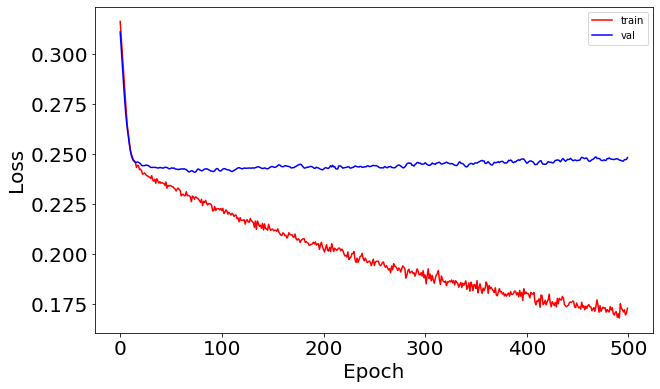

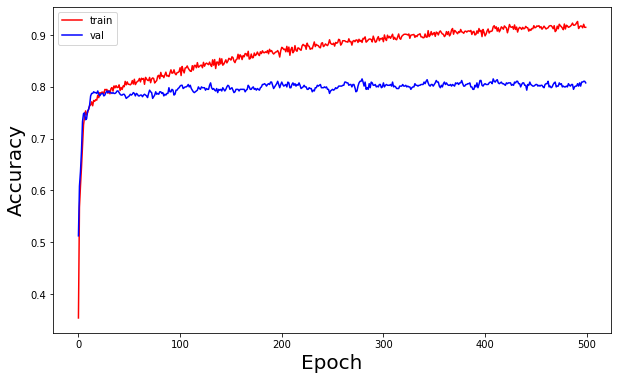

In [165]:
# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['accuracy']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_accuracy']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()

# Save and Load the Trained Models
We can save our trained models using the HDF5 binary format with the extension `.h5`

###### save the model with model.sav & joblib.dump

In [194]:
# import joblib
def save_NN_model(model_rootfile, model, xscaler, yscaler) :
    model_filename = model_rootfile + '.h5'
    model_filepath = os.path.join(".", "saved_models", model_filename )

    print('Model Save File: ', model_filepath)
    model.save(model_filepath)
    
    #save the y_scaler also to invert the predictions
    model_yscaler_filename = model_rootfile + "_yscaler.sav"
    model_yscaler_filepath = os.path.join(".", "saved_models", model_yscaler_filename)

    print('y_scaler Save File: ', model_yscaler_filepath)
    joblib.dump(y_scaler, model_yscaler_filepath)

    model_xscaler_filename = model_rootfile + "_xscaler.sav"
    model_xscaler_filepath = os.path.join(".", "saved_models", model_xscaler_filename)

    print('x_scaler Save File: ', model_xscaler_filepath)
    joblib.dump(X_scaler, model_xscaler_filepath)

In [195]:
save_NN_model("jc_redwine_first_NN", model, X_scaler, y_scaler)

Model Save File:  .\saved_models\jc_redwine_first_NN.h5
y_scaler Save File:  .\saved_models\jc_redwine_first_NN_yscaler.sav
x_scaler Save File:  .\saved_models\jc_redwine_first_NN_xscaler.sav


In [196]:
save_NN_model("jc_redwine_grid_NN", best_NN_model, X_scaler, y_scaler)

Model Save File:  .\saved_models\jc_redwine_grid_NN.h5
y_scaler Save File:  .\saved_models\jc_redwine_grid_NN_yscaler.sav
x_scaler Save File:  .\saved_models\jc_redwine_grid_NN_xscaler.sav


###### load the saved models to test

In [197]:
from tensorflow.keras.models import load_model 
load_first_trained = load_model(".\saved_models\jc_redwine_grid_NN.h5")
load_best_grid = load_model(".\saved_models\jc_redwine_grid_NN.h5")

In [198]:
# Predict with both models
first_predicts = load_first_trained.predict_classes(X_test_scaled)
grid_predicts = load_best_grid.predict_classes(X_test_scaled)

#### My Original Neural Net

In [199]:
# score the models
print(classification_report(y_test, first_predicts))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        15
           5       0.68      0.78      0.73       169
           6       0.61      0.63      0.62       149
           7       0.66      0.58      0.62        60
           8       0.00      0.00      0.00         5

    accuracy                           0.65       400
   macro avg       0.33      0.33      0.33       400
weighted avg       0.62      0.65      0.63       400



C:\Users\jimco\Anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Best Grid Neural Net

In [200]:
print(classification_report(y_test, grid_predicts))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        15
           5       0.68      0.78      0.73       169
           6       0.61      0.63      0.62       149
           7       0.66      0.58      0.62        60
           8       0.00      0.00      0.00         5

    accuracy                           0.65       400
   macro avg       0.33      0.33      0.33       400
weighted avg       0.62      0.65      0.63       400



### COMMENTARY

My GridSerach did not do a great job of refining parameters for my Neural Net model.  Need to tune other parameters

I would go with my orginal first trained NN.